In [1]:
from mancha_de_inidacao import *
import rasterio
from rasterio.plot import show
import geopandas
import fiona
import matplotlib.pyplot as plt

In [2]:
fiona.supported_drivers['KML'] = 'rw'

In [3]:
lat=-30.8767 
long=-54.1869
v=2100000
h=9

In [4]:
ponto_informado = Point((long, lat))

In [5]:
crio(v)

12.191161450700001

In [6]:
qmax_barragem(h, v)

678.4285170017035

In [7]:
srtm = rasterio.open('s31_w055_3arc_v2.tif')

In [8]:
cotas(ponto_informado, srtm, h)

(235, 244)

In [9]:
tracado = geopandas.read_file('tracado_do_rio.kml', driver='KML')

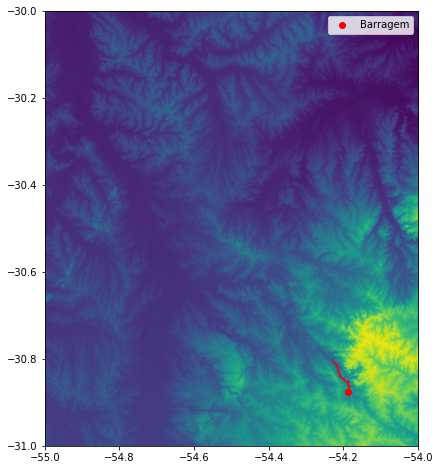

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
show(srtm, ax=ax)

ax.scatter(ponto_informado.x, ponto_informado.y, color='red', label='Barragem')

tracado.plot(ax=ax, color='red')

plt.legend()
plt.show()

In [11]:
tracado_simplificado = simplificar_tracado(tracado, 8)

<AxesSubplot:>

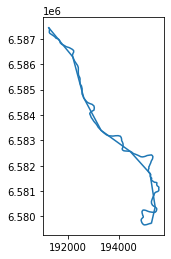

In [12]:
tracado_simplificado.plot()

In [13]:
s = secoes_perpendiculares(tracado_simplificado)

<AxesSubplot:>

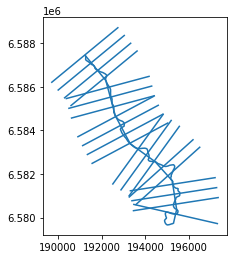

In [14]:
s.plot()

In [15]:
#exportar_geopandas(s)

In [16]:
c, d = cotas_secoes(s, srtm)

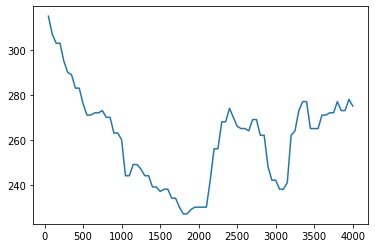

In [17]:
plt.plot(d, c[0])

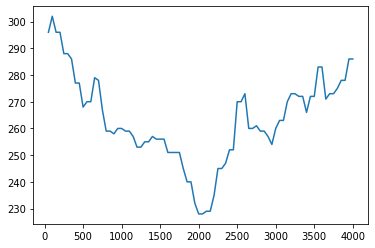

In [18]:
plt.plot(d, c[1])

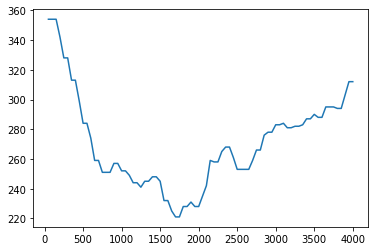

In [19]:
plt.plot(d, c[2])